# Inset Plots -- Incomplete

This section is rough. Honestly, the best way to do this is often trial and error

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.3+intel.0
Python Version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2019-12-06T15:44:44.087904


## Built In Tools

The following demos using a built in tool: `mpl_toolkits.axes_grid1.inset_locator.inset_axes`

The whole thing is not well documented, but I followed the inheretance up to `mpl_toolkits.axes_grid1.inset_locator.AnchoredOffsetbox`. From that, I got the following location guides:

    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10,
    
See [AxesGrid toolkit Overview](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#insetlocator)

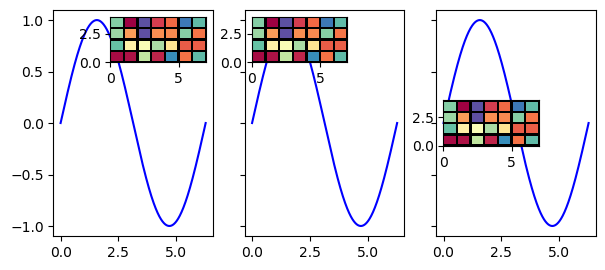

In [2]:
from mpl_toolkits.axes_grid1 import inset_locator
X = np.linspace(0,2*np.pi,1000)
np.random.seed(47344)
A = np.random.uniform(size=(4,7))

fig,axes = plt.subplots(1,3,figsize=(7,3),dpi=100,sharey=True)

locs = [1,2,6]

ax_minis = []
for ax,loc in zip(axes,locs): 
    ax.plot(X,np.sin(X),'-b')
    
    ax_mini = inset_locator.inset_axes(ax,width='60%',height='20%',loc=loc)
    
    ax_mini.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
    ax_minis.append(ax_mini) # Smart to save it 

# The following will fail with this
# fig.tight_layout()

## A Manual Worked Example

Use `fig.add_axes`

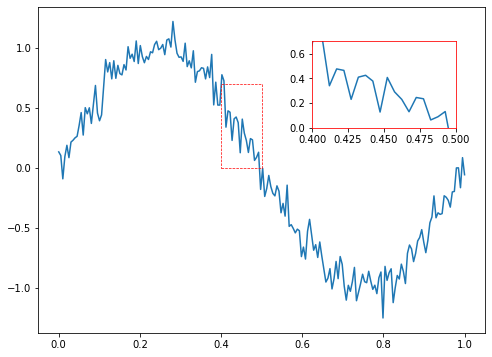

In [3]:
x = np.linspace(0,1,200)

np.random.seed(10)
y = np.sin(2*np.pi*x) + 0.1*np.random.normal(size=len(x))

#############
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(x,y)

# What to inset
xb = [0.4,0.5]
yb = [0,0.7]

# Plot it
rect = [0.6,0.6,0.25,0.2]
ax2 = fig.add_axes(rect)
ax2.plot(x,y)

ax2.set_xlim(xb)
ax2.set_ylim(yb)

for s in ['right','left','top','bottom']:
    ax2.spines[s].set_color('r')

# Draw a nice box
ax.plot([xb[0],xb[1],xb[1],xb[0],xb[0]],
        [yb[0],yb[0],yb[1],yb[1],yb[0]],'--r',linewidth=0.7)

